In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Importing the dataset
dataset = pd.read_csv('Laptop_Ads_Optimization.csv')

In [2]:
dataset.head()

,Latitude 3510,Latitude 3310,Latitude 3410,Latitude 3500,Latitude 3301,Latitude 5300,Latitude 5400,Latitude 5410,Latitude 5510,Latitude 5511,Latitude 5411,Latitude 9410,Latitude 7310
0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
dataset.shape

(8500, 13)

## Markov Decision Problem (Multi armed bandit problem)

This techniuqe leverage's the reward with the help of expoloitation-exploration trade-off. Basically, we try to experiment with many inputs so we can get the maximum results out of those inputs.

### Selecting the Ads

In [4]:
import random

# Iterating over the entire dataset
N = len(dataset)

d = 13
ads_selected = []
total_reward = 0
for n in range(N):
    # taking random laptop model ad from 1 to 13
    ad = random.randrange(d)
    # adding the ad to the selected ads array
    ads_selected.append(ad)
    # reward based on the randomly selected ad
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
print("Total reward: ", total_reward)    

Total reward:  1109


Let's see how which ads are getting the most clicks when we are running the experiment.

In [5]:
# Changing index values based on laptop models

ads = pd.Series(ads_selected).tail(1000).value_counts(normalize=True)
ads_df = pd.DataFrame(ads.values, index=ads.index, columns=['dist_per'])
columns = dataset.columns.values

idx = []
for i in ads_df.index.values:
    for j, col in enumerate(columns):
        if i == j:
            idx.append(col)
ads_df.index = idx
ads_df

,dist_per
Latitude 5511,0.100
Latitude 3500,0.089
Latitude 5410,0.086
Latitude 5510,0.078
Latitude 7310,0.077
Latitude 3410,0.077
Latitude 5300,0.076
Latitude 3301,0.076
Latitude 3510,0.075
Latitude 5411,0.073


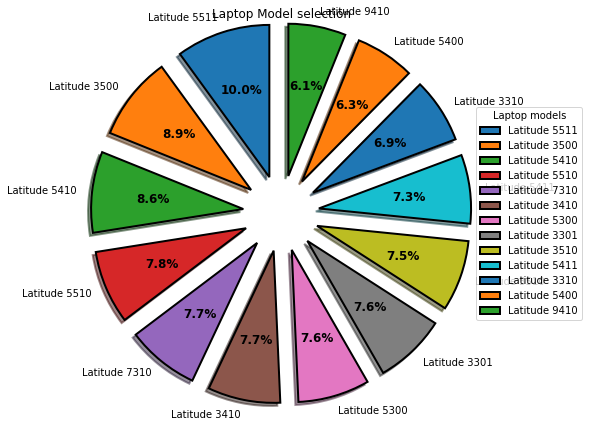

In [6]:
# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
# Creating dataset 
models = ads_df.index.values
data = ads_df['dist_per'].values
# Wedge properties 
wp = { 'linewidth' : 2, 'edgecolor' : "black" } 
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%".format(pct, absolute) 
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data), 
                                  explode = [0.25]*len(data), 
                                  labels = models, 
                                  shadow = True, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
# Adding legend 
ax.legend(wedges, models, title ="Laptop models", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 12, weight ="bold") 
ax.set_title("Laptop Model selection") 
# show plot 
plt.show() 

Every ad has almost the same probablity for clicking on the ad from 1 to 13.

## UCB (Upper Confidence Bound)

It basically try to explore an arm which hasn't been pulled yet. So if we are more uncertain about an arm then it becomes more important to explore.

In [7]:
# Implementing UCB
import math
N = len(dataset)
# for getting the number between 1 to 13.
d = 13
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0
for n in range(N):
    ad = 0
    # setting up maximum upper to 0 initially.
    max_upper_bound = 0
    # running for 13 ads
    for i in range(d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward
print("Total reward: ", total_reward)  

Total reward:  1701


In [8]:

ads = pd.Series(ads_selected).head(1500).value_counts(normalize=True)
ads_df = pd.DataFrame(ads.values, index=ads.index, columns=['dist_per'])
columns = dataset.columns.values

idx = []
for i in ads_df.index.values:
    for j, col in enumerate(columns):
        if i == j:
            idx.append(col)
ads_df.index = idx
ads_df

,dist_per
Latitude 3301,0.177333
Latitude 5410,0.132000
Latitude 3510,0.107333
Latitude 9410,0.096000
Latitude 5411,0.062000
Latitude 5400,0.062000
Latitude 3500,0.062000
Latitude 7310,0.060000
Latitude 5510,0.060000
Latitude 5511,0.048000


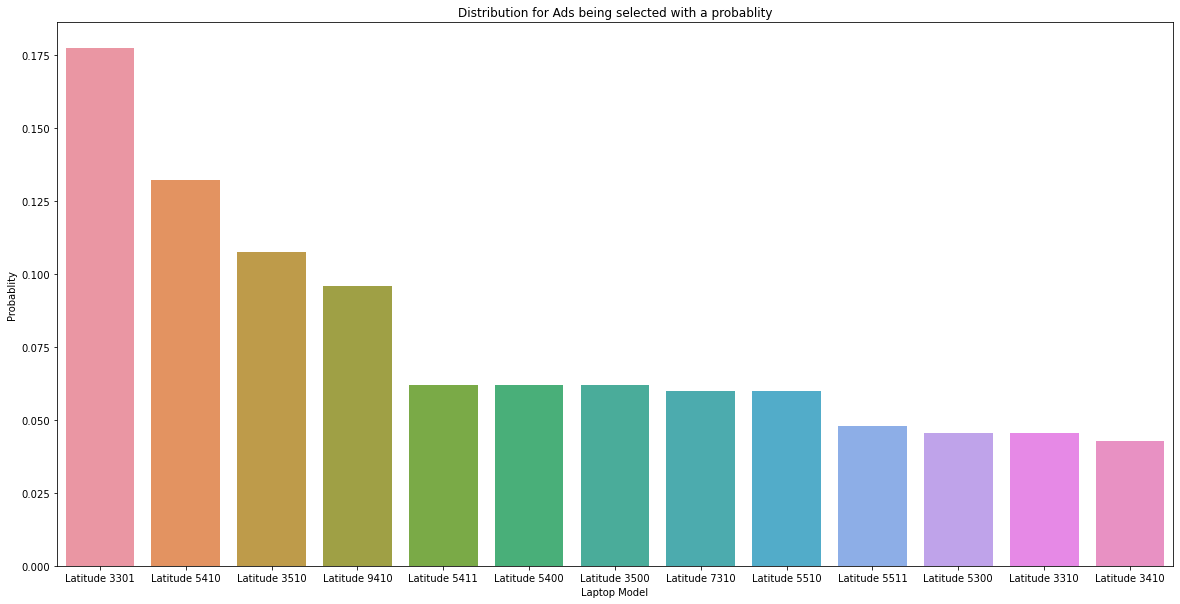

In [9]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = ads_df.index, y='dist_per', data=ads_df)
plt.title("Distribution for Ads being selected with a probablity")
plt.xlabel("Laptop Model")
plt.ylabel("Probablity")
plt.show()

We can see that Latitude 3301 was selected many times.

## Monte Carlo

### A Monte Carlo simulation is a useful tool for predicting future results by calculating a formula multiple times with different random inputs. 

Let's say we have a scenerio where salesman has to sale laptops with a commission % and sales target for the next yeaar.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
# Define the variables for the Percent to target assuming the mentioned values.
# Average target performance 100%
mean = 1

# deviation in performance 10%
std = .1

# Number of data points
reps = 500

# total iterations
simulations = 1000

In [12]:
pct_to_target = np.random.normal(mean, std, reps).round(2)

In [13]:
sales_target_values = [40000, 55000, 65000, 78000, 89000, 110000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, reps, p=sales_target_prob)

In [14]:
df = pd.DataFrame(index=range(reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df.head()

,Pct_To_Target,Sales_Target,Sales
0,1.16,55000,63800.0
1,0.94,55000,51700.0
2,1.02,65000,66300.0
3,0.94,110000,103400.0
4,0.87,40000,34800.0


<AxesSubplot:title={'center':'% to Target Distribution'}, ylabel='Frequency'>

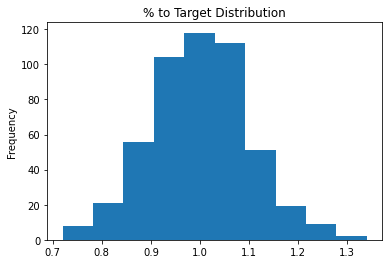

In [15]:
df['Pct_To_Target'].plot(kind='hist', title='% to Target Distribution')

<AxesSubplot:title={'center':'Sales Target Distribution'}, ylabel='Frequency'>

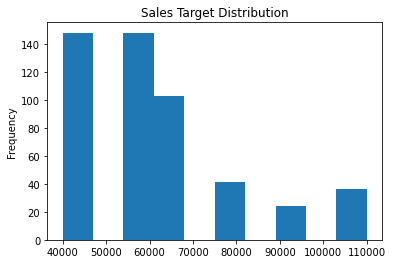

In [16]:
df['Sales_Target'].plot(kind='hist', title='Sales Target Distribution')

Let's calculate the commission based on sales we are making while considering the performance rate.

In [17]:
def calc_commission_rate(x):
    # if the performance rate is less than 90% then
    # commission on the sale will be 2%
    if x <= .90:
        return .02
    # if upto 99% then 3%
    if x <= .99:
        return .03
    # if 100% then it will be 4%
    else:
        return .04

In [18]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.16,55000,63800.0,0.04,2552.0
1,0.94,55000,51700.0,0.03,1551.0
2,1.02,65000,66300.0,0.04,2652.0
3,0.94,110000,103400.0,0.03,3102.0
4,0.87,40000,34800.0,0.02,696.0


In [19]:
all_stats = []

# Loop through many simulations
for i in range(simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, reps, p=sales_target_prob)
    pct_to_target = np.random.normal(mean, std, reps).round(2)
    
    # Dataframe is build based on the inputs and number of repitations
    df = pd.DataFrame(index=range(reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Number of sales using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Calculate and decide the commissions rate 
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # Track the sales,commission amounts and sales targets for all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [20]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"29,613,002.0","1,010,598.0","29,620,936.0"
std,"411,279.0","18,839.0","394,494.0"
min,"28,479,310.0","956,868.0","28,592,000.0"
25%,"29,342,040.0","997,414.0","29,345,000.0"
50%,"29,608,095.0","1,010,151.0","29,611,000.0"
75%,"29,896,038.0","1,022,796.0","29,893,250.0"
max,"31,107,240.0","1,067,470.0","30,959,000.0"
